In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [34]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

### 데이터 로드

In [2]:
df = pd.read_parquet('nov.gzip')
df

,event_time,event_type,product_id,category_code,brand,price,user_id,대분류,소분류
index,,,,,,,,,
168,2019-11-01 00:01:04 UTC,purchase,1005161,electronics.smartphone,xiaomi,211.92,513351129,electronics,smartphone
707,2019-11-01 00:04:51 UTC,purchase,1004856,electronics.smartphone,samsung,128.42,562958505,electronics,smartphone
939,2019-11-01 00:06:33 UTC,purchase,1801881,electronics.video.tv,samsung,488.80,557746614,electronics,video
942,2019-11-01 00:06:34 UTC,purchase,5800823,electronics.audio.subwoofer,nakamichi,123.56,514166940,electronics,audio
1107,2019-11-01 00:07:38 UTC,purchase,30000218,construction.tools.welding,magnetta,254.78,515240495,construction,tools
...,...,...,...,...,...,...,...,...,...
67501716,2019-11-30 23:58:08 UTC,purchase,1004767,electronics.smartphone,samsung,235.60,574868869,electronics,smartphone
67501725,2019-11-30 23:58:14 UTC,purchase,1004874,electronics.smartphone,samsung,346.70,547804983,electronics,smartphone
67501745,2019-11-30 23:58:22 UTC,purchase,1005130,electronics.smartphone,apple,1437.02,515582054,electronics,smartphone


In [3]:
df.shape

(659256, 9)

In [4]:
df.tail()

,event_time,event_type,product_id,category_code,brand,price,user_id,대분류,소분류
index,,,,,,,,,
67501716,2019-11-30 23:58:08 UTC,purchase,1004767,electronics.smartphone,samsung,235.60,574868869,electronics,smartphone
67501725,2019-11-30 23:58:14 UTC,purchase,1004874,electronics.smartphone,samsung,346.70,547804983,electronics,smartphone
67501745,2019-11-30 23:58:22 UTC,purchase,1005130,electronics.smartphone,apple,1437.02,515582054,electronics,smartphone
67501824,2019-11-30 23:58:57 UTC,purchase,1004767,electronics.smartphone,samsung,235.60,579876821,electronics,smartphone
67501863,2019-11-30 23:59:15 UTC,purchase,3701309,appliances.environment.vacuum,polaris,89.32,543733099,appliances,environment


In [5]:
df = df[df['대분류'] == 'apparel'].copy()
df

,event_time,event_type,product_id,category_code,brand,price,user_id,대분류,소분류
index,,,,,,,,,
5020,2019-11-01 00:31:57 UTC,purchase,28717081,apparel.shoes.keds,puma,100.13,560914255,apparel,shoes
5893,2019-11-01 00:36:13 UTC,purchase,28715623,apparel.shoes.keds,peak,82.34,549422045,apparel,shoes
6568,2019-11-01 00:39:31 UTC,purchase,28704386,apparel.shoes.keds,asics,51.48,524543436,apparel,shoes
25585,2019-11-01 02:01:40 UTC,purchase,28716422,apparel.shoes,respect,86.23,538018965,apparel,shoes
30521,2019-11-01 02:12:42 UTC,purchase,28704601,apparel.shoes,etor,100.39,552942348,apparel,shoes
...,...,...,...,...,...,...,...,...,...
67469324,2019-11-30 21:35:46 UTC,purchase,28717962,apparel.shoes,ara,145.43,540126489,apparel,shoes
67483148,2019-11-30 22:18:31 UTC,purchase,39900064,apparel.trousers,daneildesch,42.47,579939590,apparel,trousers
67489421,2019-11-30 22:44:54 UTC,purchase,28718474,apparel.shoes.keds,strobbs,55.34,572549713,apparel,shoes


In [6]:
# 이상치 확인
df.isnull().sum()

event_time       0
event_type       0
product_id       0
category_code    0
brand            0
price            0
user_id          0
대분류              0
소분류              0
dtype: int64

### box plot 이상치 제거
* (1분위수 - 1.5*IQR > 이상치)
* (3분위수 + 1.5*IQR < 이상치)

<AxesSubplot:xlabel='price'>

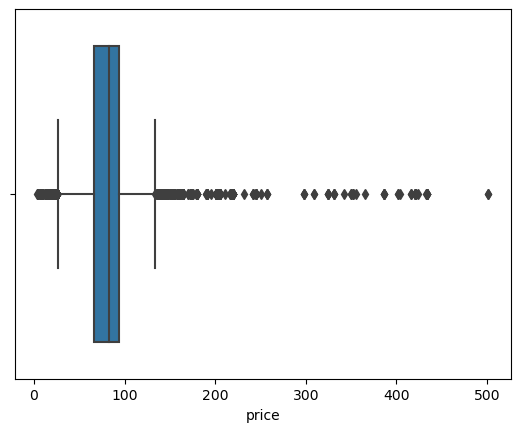

In [7]:
sns.boxplot(data=df[['price']], x='price')

In [8]:
IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)
a = df['price'].quantile(0.25) - (1.5*IQR)
b = df['price'].quantile(0.75) + (1.5*IQR)

In [9]:
# 이상치 제거하기
df = df.loc[(a<df['price']) & (df['price'] < b)].copy()
df

,event_time,event_type,product_id,category_code,brand,price,user_id,대분류,소분류
index,,,,,,,,,
5020,2019-11-01 00:31:57 UTC,purchase,28717081,apparel.shoes.keds,puma,100.13,560914255,apparel,shoes
5893,2019-11-01 00:36:13 UTC,purchase,28715623,apparel.shoes.keds,peak,82.34,549422045,apparel,shoes
6568,2019-11-01 00:39:31 UTC,purchase,28704386,apparel.shoes.keds,asics,51.48,524543436,apparel,shoes
25585,2019-11-01 02:01:40 UTC,purchase,28716422,apparel.shoes,respect,86.23,538018965,apparel,shoes
30521,2019-11-01 02:12:42 UTC,purchase,28704601,apparel.shoes,etor,100.39,552942348,apparel,shoes
...,...,...,...,...,...,...,...,...,...
67463004,2019-11-30 21:20:13 UTC,purchase,28716424,apparel.shoes,respect,86.23,567840105,apparel,shoes
67483148,2019-11-30 22:18:31 UTC,purchase,39900064,apparel.trousers,daneildesch,42.47,579939590,apparel,trousers
67489421,2019-11-30 22:44:54 UTC,purchase,28718474,apparel.shoes.keds,strobbs,55.34,572549713,apparel,shoes


###  최근 주문일 구하기

In [10]:
# 날짜 형식으로 바꾸기
df['event_time'] = pd.to_datetime(df['event_time'])

In [11]:
# 잘 바뀌었는지 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10907 entries, 5020 to 67500256
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   event_time     10907 non-null  datetime64[ns, UTC]
 1   event_type     10907 non-null  object             
 2   product_id     10907 non-null  int64              
 3   category_code  10907 non-null  object             
 4   brand          10907 non-null  object             
 5   price          10907 non-null  float64            
 6   user_id        10907 non-null  int64              
 7   대분류            10907 non-null  object             
 8   소분류            10907 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 852.1+ KB


In [12]:
# 혹시 모를 중복 파일 제거하기
df = df.drop_duplicates()

In [13]:
# Recency 계산을 위해 해당 주문에서 가장 최근 구매가 일어난 시간을 가져옵니다.
# 최근 거래 기준일(last_timestamp)을 만들기 위해 timedelta로 날짜를 더해줍니다.(최소값:1 설정) => 마지막 날을 1로 만들어 주기 위하여
last_timestamp = df['event_time'].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2019-12-01 23:48:17+0000', tz='UTC')

### 고객별 Recency, Frequency, Monetary 값 구하기

In [14]:
# Recency : 최근 거래 기준일(last_timestamp)과 고객별 최근 구매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액
# lambda x : 최근 마지막 거래일과 해당 고객의 마지막 거래일의 차이를 구한 후 날짜만 반환하게 해준다.
rfm = df.groupby('user_id').agg({'event_time' : lambda x : (last_timestamp - x.max()).days,
                                    "user_id" : 'count',
                                    'price' : 'sum'})
rfm.head(10)

,event_time,user_id,price
user_id,,,
353600697,11,1,88.03
506255779,2,1,77.22
512168831,5,1,127.42
512364888,2,2,93.44
512365577,24,1,71.82
512365769,6,1,62.81
512366794,22,1,75.42
512366835,15,1,122.27
512367267,8,2,158.04


In [15]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm

,Recency,Frequency,Monetary
user_id,,,
353600697,11,1,88.03
506255779,2,1,77.22
512168831,5,1,127.42
512364888,2,2,93.44
512365577,24,1,71.82
...,...,...,...
579664706,1,1,88.03
579744564,1,1,79.02
579828565,1,1,80.83


In [16]:
rfm['Frequency'].describe()

count    7380.000000
mean        1.477913
std         1.414760
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        53.000000
Name: Frequency, dtype: float64

In [17]:
# frequency 값 확인하기
rfm['Frequency'].unique()

array([ 1,  2,  7,  3,  4, 12, 10,  5,  6,  8, 15, 14, 13, 28,  9, 53, 16,
       11, 22, 25, 18], dtype=int64)

In [18]:
rfm.quantile(q=[0.25, 0.5, 0.75])

,Recency,Frequency,Monetary
0.25,10.0,1.0,71.82
0.50,14.0,1.0,86.23
0.75,19.0,1.0,124.97


In [19]:
quartiles=rfm.quantile(q=[0.25,0.5,0.75]).to_dict()
quartiles

{'Recency': {0.25: 10.0, 0.5: 14.0, 0.75: 19.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 71.82, 0.5: 86.23, 0.75: 124.97}}

In [20]:
# 함수로 값 주기

# recency
def r(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Frequency and Monetary 

def fm(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1    

In [21]:
# RFM segmentation column을 만든다.
rfm['R_Quartile'] = rfm['Recency'].apply(r, args=('Recency',quartiles,))
rfm['F_Quartile'] = rfm['Frequency'].apply(fm, args=('Frequency',quartiles,))
rfm['M_Quartile'] = rfm['Monetary'].apply(fm, args=('Monetary',quartiles,))
rfm['RFM_segmentation'] = rfm.R_Quartile.map(str) \
                    + rfm.F_Quartile.map(str) \
                    + rfm.M_Quartile.map(str)
rfm['RFM_score'] = rfm.R_Quartile.map(int) \
                    + rfm.F_Quartile.map(int) \
                    + rfm.M_Quartile.map(int)
rfm.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
user_id,,,,,,,,
353600697,11,1,88.03,2,4,2,242,8
506255779,2,1,77.22,1,4,3,143,8
512168831,5,1,127.42,1,4,1,141,6
512364888,2,2,93.44,1,1,2,112,4
512365577,24,1,71.82,4,4,4,444,12


### rfm 잘 만들어졌는지 시각화 하기

<AxesSubplot:xlabel='RFM_segmentation', ylabel='RFM_score'>

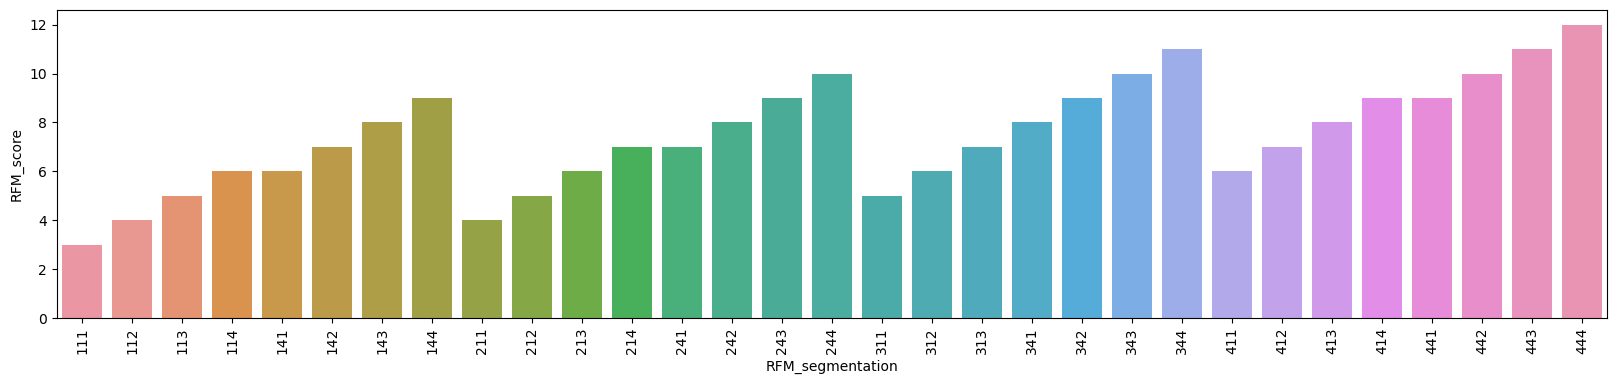

In [22]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values('RFM_segmentation'), x='RFM_segmentation', y='RFM_score')

<Figure size 2000x600 with 0 Axes>

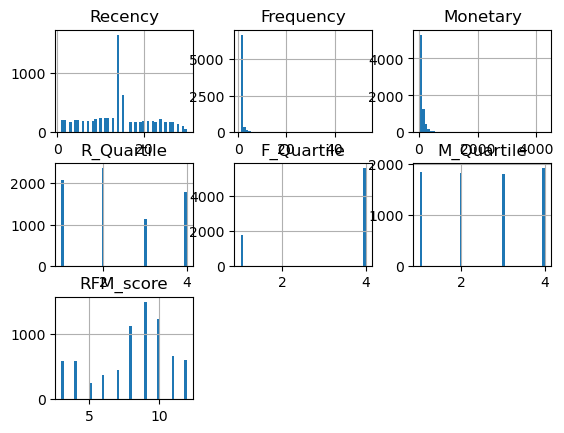

<Figure size 2000x600 with 0 Axes>

In [25]:

rfm.hist(bins=50);
plt.figure(figsize=(20, 6))

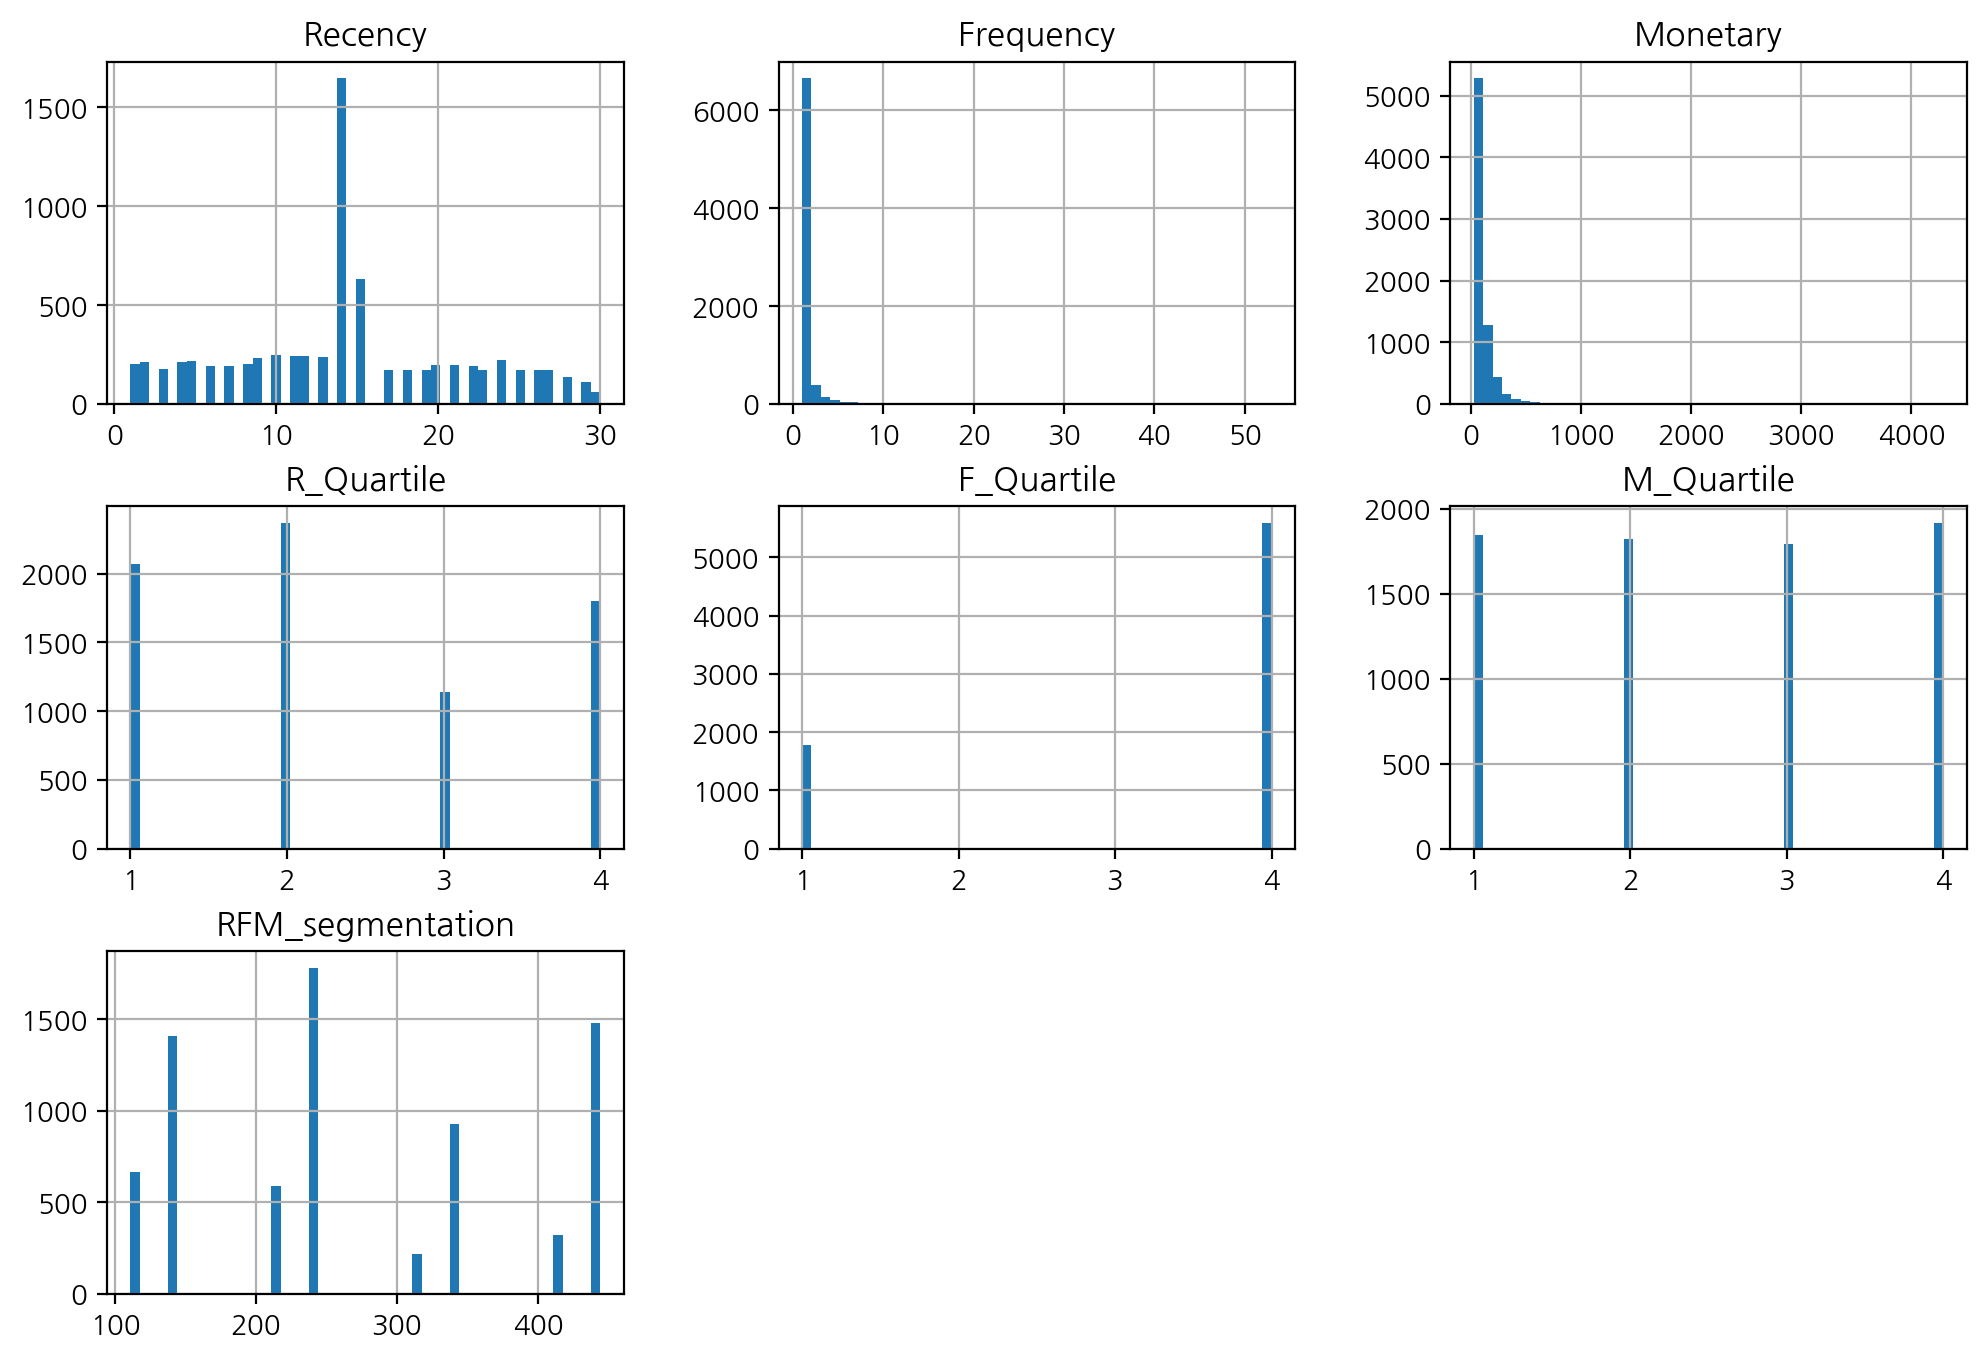

In [37]:
# rfm을 구간화하면 기존에 몰려있던 데이터가 같은 비율로 나뉜 것을 볼 수 있다.
rfm.iloc[:, :-2].astype(float).hist(figsize=(12,8), bins =50);

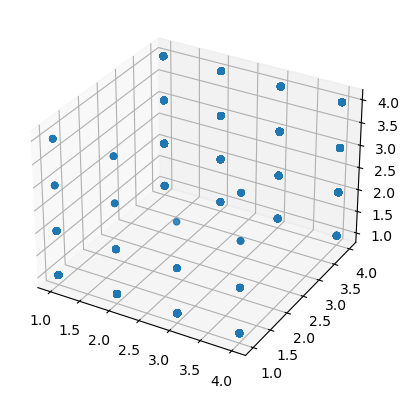

In [27]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm['R_Quartile'], rfm['F_Quartile'], rfm['M_Quartile'])

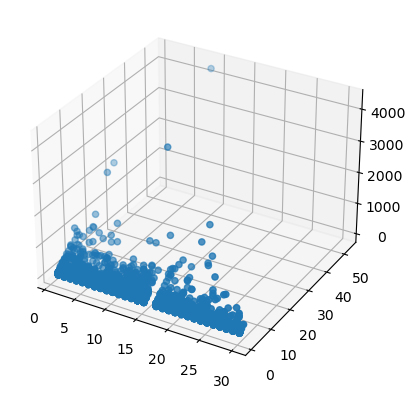

In [28]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm['Recency'], rfm['Frequency'], rfm['Monetary'])

### qcut 통한 고객군 나누기

In [29]:
rfm.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
user_id,,,,,,,,
353600697,11,1,88.03,2,4,2,242,8
506255779,2,1,77.22,1,4,3,143,8
512168831,5,1,127.42,1,4,1,141,6
512364888,2,2,93.44,1,1,2,112,4
512365577,24,1,71.82,4,4,4,444,12


In [30]:
rfm["RFM_class"] = pd.qcut(rfm['RFM_score'], q=3, labels=['silver', 'gold', 'platinum'])
rfm

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_class
user_id,,,,,,,,,
353600697,11,1,88.03,2,4,2,242,8,silver
506255779,2,1,77.22,1,4,3,143,8,silver
512168831,5,1,127.42,1,4,1,141,6,silver
512364888,2,2,93.44,1,1,2,112,4,silver
512365577,24,1,71.82,4,4,4,444,12,platinum
...,...,...,...,...,...,...,...,...,...
579664706,1,1,88.03,1,4,2,142,7,silver
579744564,1,1,79.02,1,4,3,143,8,silver
579828565,1,1,80.83,1,4,3,143,8,silver


In [31]:
rfm[rfm['RFM_class'] == 'platinum']

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_class
user_id,,,,,,,,,
512365577,24,1,71.82,4,4,4,444,12,platinum
512366794,22,1,75.42,4,4,3,443,11,platinum
512368669,29,1,82.63,4,4,3,443,11,platinum
512375577,24,1,70.79,4,4,4,444,12,platinum
512381616,27,1,73.36,4,4,3,443,11,platinum
...,...,...,...,...,...,...,...,...,...
572208945,15,1,62.81,3,4,4,344,11,platinum
572215987,15,1,33.46,3,4,4,344,11,platinum
572218765,15,1,62.81,3,4,4,344,11,platinum


In [32]:
rfm.groupby('RFM_class')['RFM_score'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,3378.0,5.846655,1.952392,3.0,4.0,6.0,8.0,8.0
gold,2739.0,9.450529,0.497637,9.0,9.0,9.0,10.0,10.0
platinum,1263.0,11.476643,0.499652,11.0,11.0,11.0,12.0,12.0


<AxesSubplot:xlabel='RFM_class', ylabel='RFM_score'>

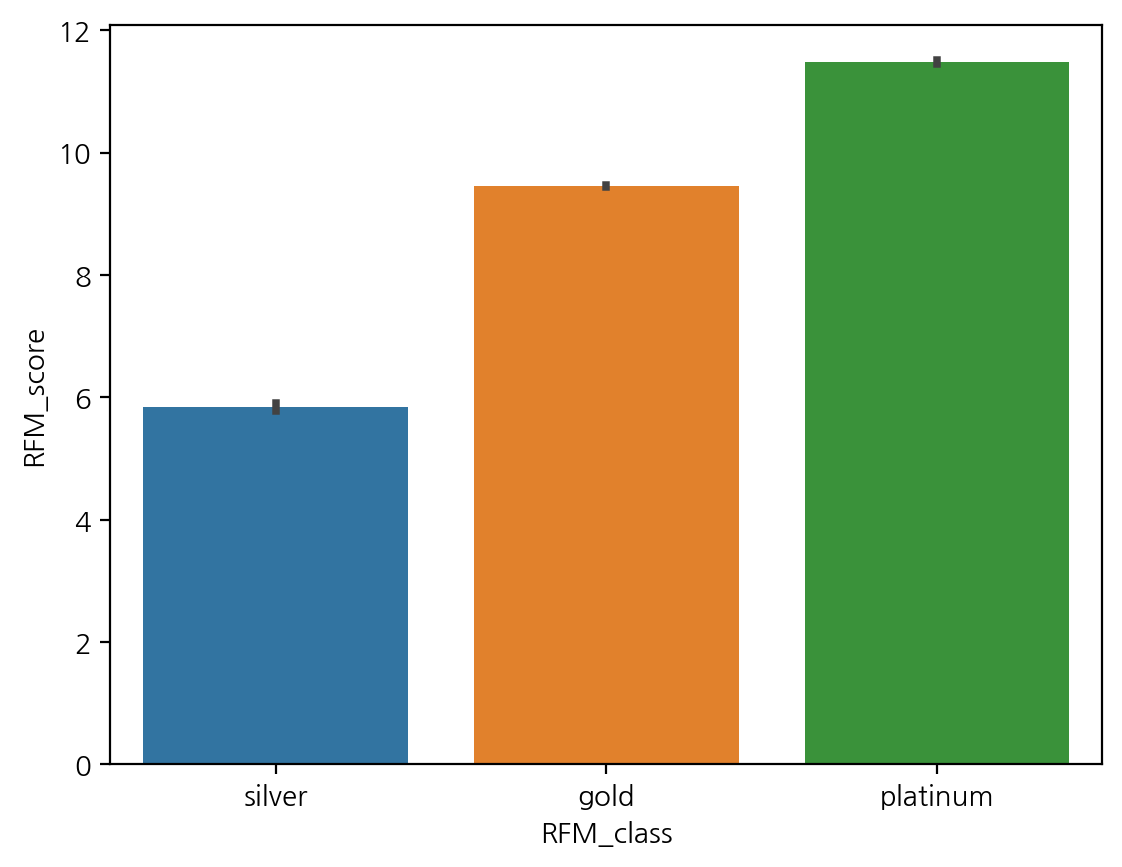

In [39]:
sns.barplot(data=rfm, x="RFM_class", y="RFM_score")
# plt.title('11월 RFM')

<AxesSubplot:xlabel='RFM_class', ylabel='RFM_score'>

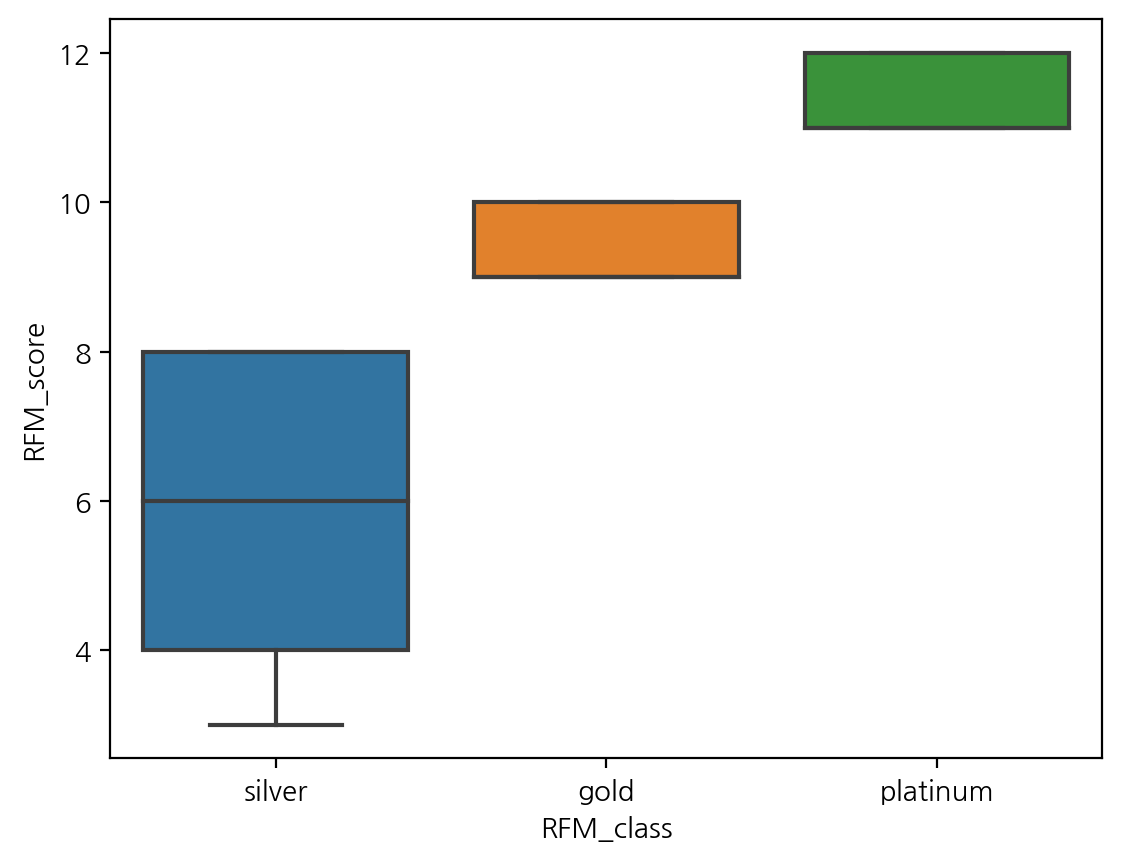

In [40]:
sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")
# plt.title('11월 RFM')

In [38]:
rfm.groupby('RFM_class').agg({"Recency":'mean', "Frequency":'mean',"Monetary":["mean", "sum", "count"]})

Recency Frequency    Monetary                 
                mean      mean        mean        sum count
RFM_class                                                  
silver     10.975133  2.042037  173.305503  585425.99  3378
gold       14.628332  1.002556   78.165502  214095.31  2739
platinum   22.669834  1.000000   63.134109   79738.38  1263

In [66]:
rfm.to_csv('rfm_nov.csv')

In [67]:
pd.read_csv('rfm_nov.csv')

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_class
0,353600697,11,1,88.03,2,4,2,242,8,silver
1,506255779,2,1,77.22,1,4,3,143,8,silver
2,512168831,5,1,127.42,1,4,1,141,6,silver
3,512364888,2,2,93.44,1,1,2,112,4,silver
4,512365577,24,1,71.82,4,4,4,444,12,platinum
...,...,...,...,...,...,...,...,...,...,...
7375,579664706,1,1,88.03,1,4,2,142,7,silver
7376,579744564,1,1,79.02,1,4,3,143,8,silver
7377,579828565,1,1,80.83,1,4,3,143,8,silver
7378,579833547,1,1,80.83,1,4,3,143,8,silver
